# 목표

- 정상적인 사용자와 분산형 크롤러를 구분 가능한지 확인한다.


# 순서

1. 웹 트래픽 데이터를 로드한다.
2. 전반부 15일과 후반부 15일을 분리한다.
3. 전반부 15일로 td3 영역을 체크한다. 0회 접근한 아이템 까지 포함한다.
4. 후반부 15일 트래픽으로 false positive를 확인한다.
5. 크롤러로 true positive를 확인한다.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
import anti_crawler as ac

In [3]:
a = ac.AntiCrawl()

                     IP                  DATE TYPE  \
0          199.72.81.55  01/Jul/1995:00:00:01  GET   
1  unicomp6.unicomp.net  01/Jul/1995:00:00:06  GET   
2        199.120.110.21  01/Jul/1995:00:00:09  GET   
3    burger.letters.com  01/Jul/1995:00:00:11  GET   
4        199.120.110.21  01/Jul/1995:00:00:11  GET   

                                               URI  RESULT  SIZE  
0                                 /history/apollo/   200.0  6245  
1                              /shuttle/countdown/   200.0  3985  
2     /shuttle/missions/sts-73/mission-sts-73.html   200.0  4085  
3                  /shuttle/countdown/liftoff.html   304.0     0  
4  /shuttle/missions/sts-73/sts-73-patch-small.gif   200.0  4179  


108 2164 5412


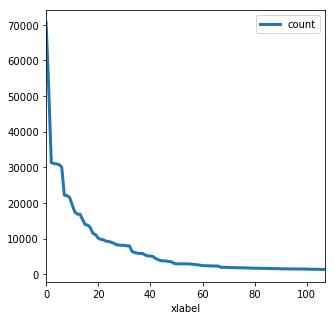

count      108.000000
mean      7376.537037
std      10584.519839
min       1327.000000
25%       1669.000000
50%       2901.500000
75%       8359.750000
max      70711.000000
Name: count, dtype: float64


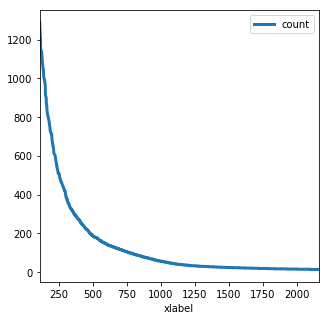

count    2056.000000
mean      133.397860
std       215.147161
min        13.000000
25%        20.000000
50%        39.000000
75%       136.000000
max      1289.000000
Name: count, dtype: float64


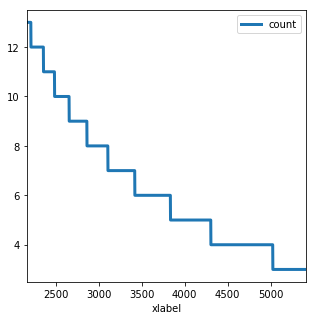

count    19485.000000
mean         2.052245
std          2.226462
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         13.000000
Name: count, dtype: float64


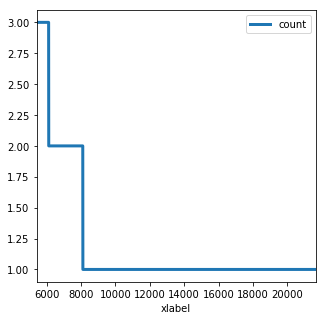

count    19485.000000
mean         2.052245
std          2.226462
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         13.000000
Name: count, dtype: float64


In [4]:
td3 = a.get_td3()

In [25]:
def simulate(crawl_num, df, item_list, threshold):
    result = dict()
    attacker_ip = [x for x in range(crawl_num)]
    server_mem = dict()
    
    td3_list = df[df['count'] <= threshold]['uri'].values

    aip = 0
    for pos, item in enumerate(item_list):
        laip = len(attacker_ip)
        
        result[pos] = laip
        
        if laip < 1:
            continue
            
        aip = (aip + 1) % laip
        
        if item not in td3_list:
            continue
            
        atkip = attacker_ip[aip]

        if atkip not in server_mem:
            server_mem[atkip] = 1
            continue

        server_mem[atkip] += 1

        if server_mem[atkip] >  threshold:
            attacker_ip.remove(atkip)       
    
    df_result = pd.DataFrame.from_dict(result, orient='index')
    ax = df_result.plot()
    ax.legend(["number of nodes"])
    plt.show()
    
    return laip


def simulate_real(df_traffic, df_td3, threshold):
    result = dict()
    server_mem = dict()
    banned = list()
    server_mem = dict()
    
    td3_list = df_td3[df_td3['count'] <= threshold]['uri'].values
    n = 0
    
    for item in df_traffic.iterrows():
        uri = item[1].URI
        ip = item[1].IP
        
        result[n] = len(banned)
        n += 1
        
        if ip in banned:
            continue
            
        if uri not in td3_list:
            continue
            
        if ip not in server_mem:
            server_mem[ip] = 1
        else:
            server_mem[ip] += 1
        
        if server_mem[ip] > threshold:
            banned.append(ip)
            print(banned)
            
    df_result = pd.DataFrame.from_dict(result, orient='index')
    df_result.plot()
    plt.show()
    
    return banned
        
        

21649
(16237, 4)


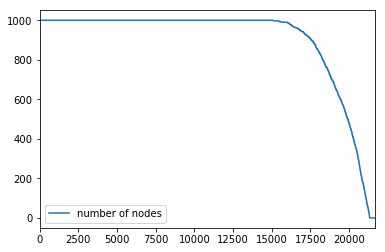

0


In [26]:
# item_list = td3['uri'].tolist()
df_count = a.get_item_count(a.df)
item_list = df_count['uri'].tolist()
random.shuffle(item_list)
print(len(item_list))
print(td3.shape)
result = simulate(1000, td3, item_list, 15)
print(result)

In [17]:
# df_traffic = a.df[a.df['day'] > 14][['IP', 'URI']]
gr_traffic = a.df.groupby('day')

['dawn14.cs.berkeley.edu']


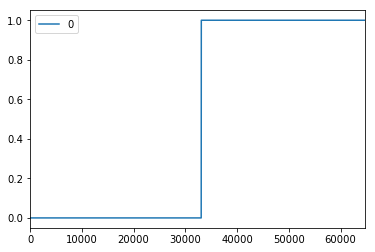

1|64714|1|5192|0.000193|dawn14.cs.berkeley.edu

['dawn14.cs.berkeley.edu']
---------------------------
['dawn14.cs.berkeley.edu']


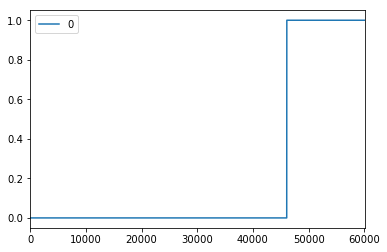

2|60118|1|4856|0.000206|dawn14.cs.berkeley.edu

['dawn14.cs.berkeley.edu']
---------------------------


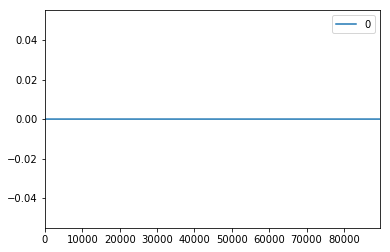

3|89584|0|7336|0.000000|

[]
---------------------------


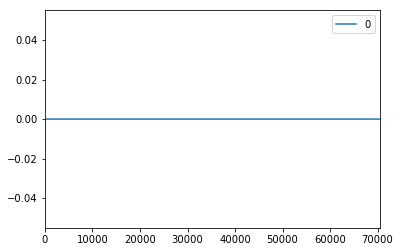

4|70452|0|5524|0.000000|

[]
---------------------------
['reddragon.ksc.nasa.gov']
['reddragon.ksc.nasa.gov', 'fixx.informatics.jax.org']


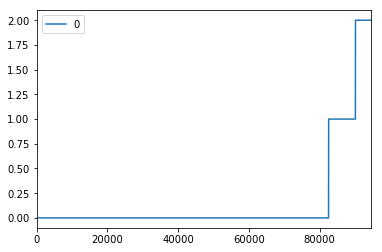

5|94575|2|7383|0.000271|reddragon.ksc.nasa.gov,fixx.informatics.jax.org

['reddragon.ksc.nasa.gov', 'fixx.informatics.jax.org']
---------------------------


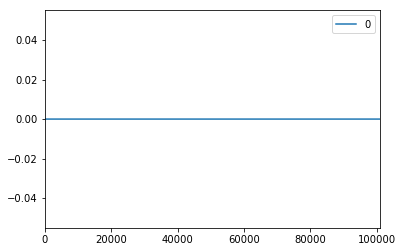

6|100960|0|7820|0.000000|

[]
---------------------------
['128.217.62.81']


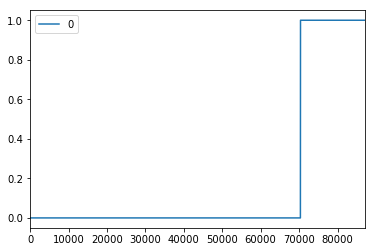

7|87160|1|6472|0.000155|128.217.62.81

['128.217.62.81']
---------------------------


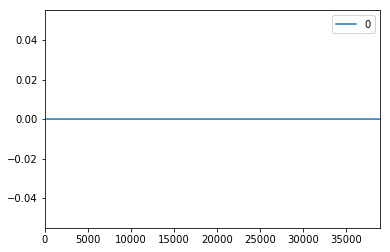

8|38867|0|2898|0.000000|

[]
---------------------------


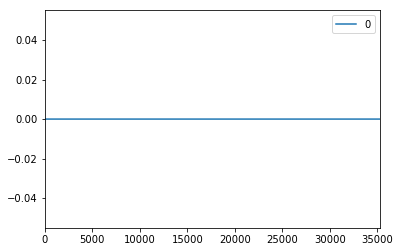

9|35272|0|2554|0.000000|

[]
---------------------------


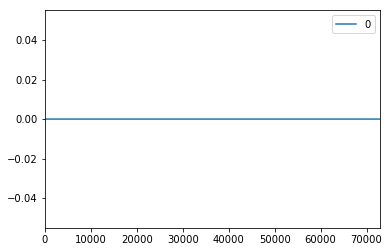

10|72860|0|4464|0.000000|

[]
---------------------------


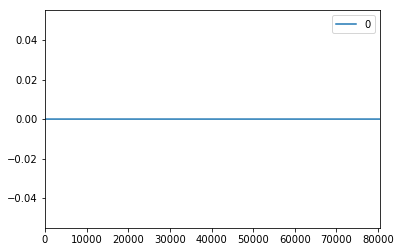

11|80407|0|4927|0.000000|

[]
---------------------------


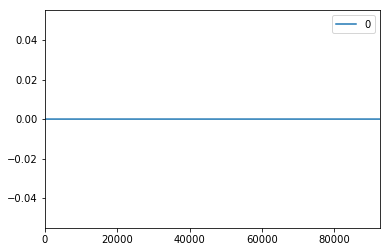

12|92536|0|5345|0.000000|

[]
---------------------------
['alyssa.prodigy.com']
['alyssa.prodigy.com', 'piweba1y.prodigy.com']
['alyssa.prodigy.com', 'piweba1y.prodigy.com', 'piweba3y.prodigy.com']


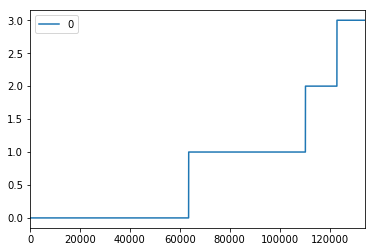

13|134203|3|6951|0.000432|alyssa.prodigy.com,piweba1y.prodigy.com,piweba3y.prodigy.com

['alyssa.prodigy.com', 'piweba1y.prodigy.com', 'piweba3y.prodigy.com']
---------------------------


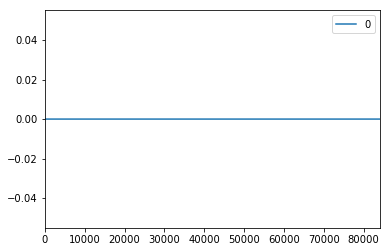

14|84032|0|5294|0.000000|

[]
---------------------------
['piweba4y.prodigy.com']
['piweba4y.prodigy.com', 'piweba3y.prodigy.com']
['piweba4y.prodigy.com', 'piweba3y.prodigy.com', 'pm2_27.digital.net']


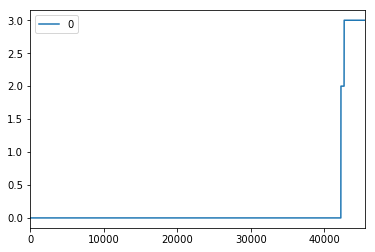

15|45532|3|3116|0.000963|piweba4y.prodigy.com,piweba3y.prodigy.com,pm2_27.digital.net

['piweba4y.prodigy.com', 'piweba3y.prodigy.com', 'pm2_27.digital.net']
---------------------------
['piweba4y.prodigy.com']
['piweba4y.prodigy.com', 'piweba3y.prodigy.com']


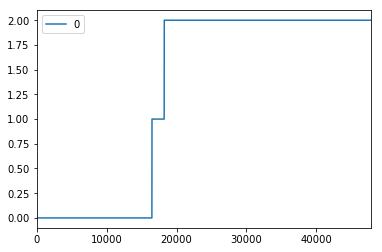

16|47854|2|3013|0.000664|piweba4y.prodigy.com,piweba3y.prodigy.com

['piweba4y.prodigy.com', 'piweba3y.prodigy.com']
---------------------------


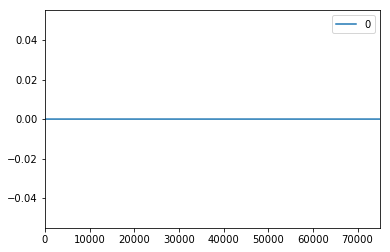

17|74981|0|4943|0.000000|

[]
---------------------------
['titan02f']


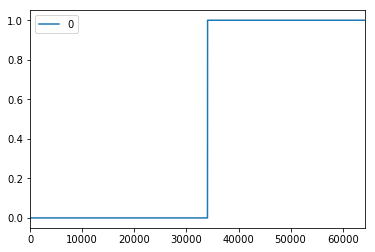

18|64282|1|4523|0.000221|titan02f

['titan02f']
---------------------------
['www']
['www', 'hoohoo.ncsa.uiuc.edu']
['www', 'hoohoo.ncsa.uiuc.edu', 'fysvz.fys.ruu.nl']


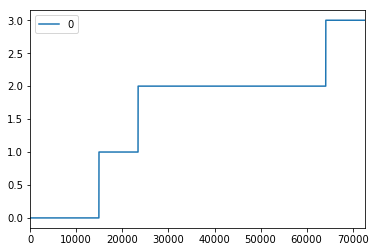

19|72657|3|4918|0.000610|www,hoohoo.ncsa.uiuc.edu,fysvz.fys.ruu.nl

['www', 'hoohoo.ncsa.uiuc.edu', 'fysvz.fys.ruu.nl']
---------------------------
['128.159.132.69']
['128.159.132.69', 'tiber.gsfc.nasa.gov']
['128.159.132.69', 'tiber.gsfc.nasa.gov', 'jbiagioni.npt.nuwc.navy.mil']


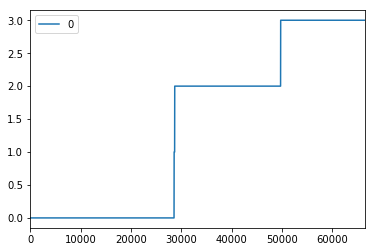

20|66514|3|4727|0.000635|128.159.132.69,tiber.gsfc.nasa.gov,jbiagioni.npt.nuwc.navy.mil

['128.159.132.69', 'tiber.gsfc.nasa.gov', 'jbiagioni.npt.nuwc.navy.mil']
---------------------------


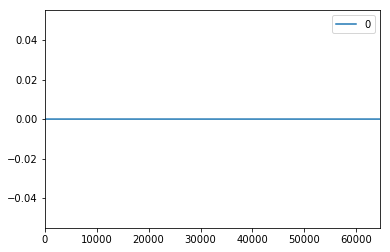

21|64555|0|4337|0.000000|

[]
---------------------------


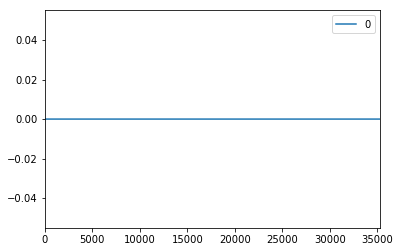

22|35267|0|2575|0.000000|

[]
---------------------------


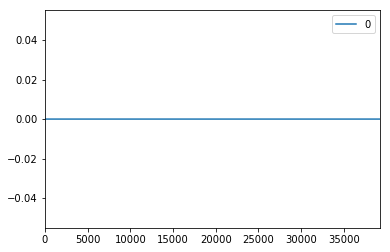

23|39199|0|2635|0.000000|

[]
---------------------------


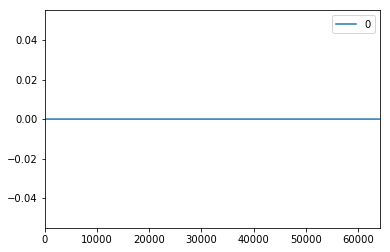

24|64179|0|4298|0.000000|

[]
---------------------------
['163.205.1.45']
['163.205.1.45', 'jbiagioni.npt.nuwc.navy.mil']


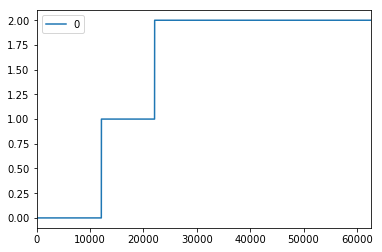

25|62699|2|4376|0.000457|163.205.1.45,jbiagioni.npt.nuwc.navy.mil

['163.205.1.45', 'jbiagioni.npt.nuwc.navy.mil']
---------------------------
['156.80.168.122']


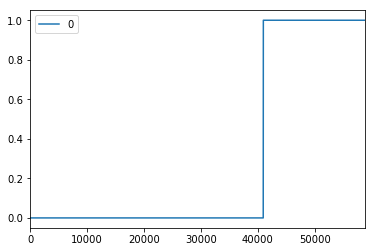

26|58849|1|4296|0.000233|156.80.168.122

['156.80.168.122']
---------------------------
['jalisco.engr.ucdavis.edu']


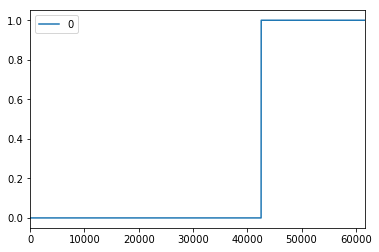

27|61680|1|4368|0.000229|jalisco.engr.ucdavis.edu

['jalisco.engr.ucdavis.edu']
---------------------------


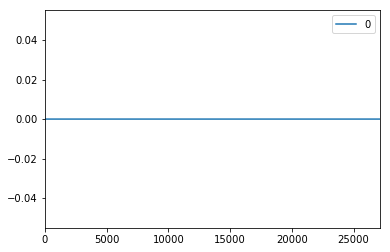

28|27122|0|2175|0.000000|

[]
---------------------------


C:\Users\inwoo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


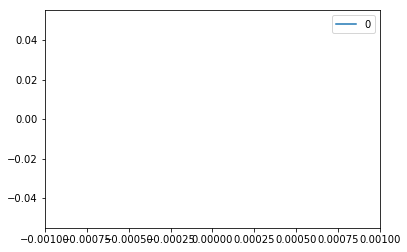

ZeroDivisionError: division by zero

In [22]:
# print(df_traffic.shape)
# banned = simulate_real(df_traffic, td3, 30)
with open("day_traffic_fp.csv", 'w', encoding='utf-8') as fo:
    fo.write("DAY|NUM_TRFC|NUM_IP|NUM_BANNED|FP_RATE\n")
    for day, df_trf in gr_traffic:  
        banned = simulate_real(df_trf, td3, 30)
        num_banned = len(banned)
        num_traffic = df_trf.shape[0]
#         print(df_trf.columns)
        day_ip = df_trf['IP'].nunique()
        wline = "%d|%d|%d|%d|%f|%s\n" % (day, num_traffic, num_banned, day_ip, (num_banned / day_ip), ",".join(banned))
        print(wline)
        fo.write(wline)
        print(banned)
        print("---------------------------")

In [6]:
a.df['IP'].nunique()

81978

In [7]:
a.df['URI'].nunique()

21649

In [30]:
df_day_trfc = pd.read_csv("day_traffic_fp.csv", sep='|', encoding='utf-8')
df_day_trfc

,DAY,NUM_TRFC,NUM_BANNED,NUM_IP,FP_RATE,BANNED_IP
0,1,64714,1,5192,0.000193,dawn14.cs.berkeley.edu
1,2,60118,1,4856,0.000206,dawn14.cs.berkeley.edu
2,3,89584,0,7336,0.000000,NaN
3,4,70452,0,5524,0.000000,NaN
4,5,94575,2,7383,0.000271,"reddragon.ksc.nasa.gov,fixx.informatics.jax.org"
5,6,100960,0,7820,0.000000,NaN
6,7,87160,1,6472,0.000155,128.217.62.81
7,8,38867,0,2898,0.000000,NaN
8,9,35272,0,2554,0.000000,NaN
9,10,72860,0,4464,0.000000,NaN


In [31]:
df_day_trfc.describe()

,DAY,NUM_TRFC,NUM_BANNED,NUM_IP,FP_RATE
count,28.000000,28.000000,28.000000,28.000000,28.000000
mean,14.500000,67539.642857,0.857143,4689.857143,0.000188
std,8.225975,23400.846031,1.112697,1528.499524,0.000264
min,1.000000,27122.000000,0.000000,2175.000000,0.000000
25%,7.750000,56100.250000,0.000000,4001.000000,0.000000
50%,14.500000,64634.500000,0.000000,4625.000000,0.000000
75%,21.250000,81313.250000,1.250000,5306.750000,0.000242
max,28.000000,134203.000000,3.000000,7820.000000,0.000963


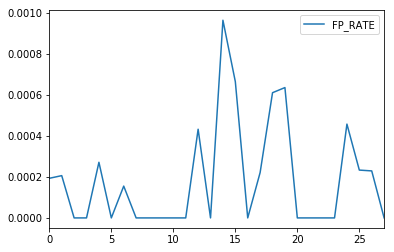

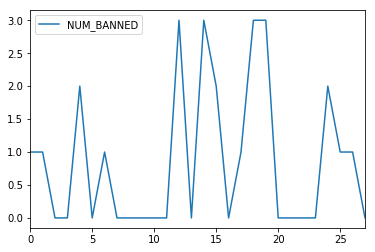

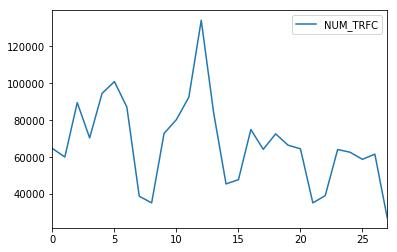

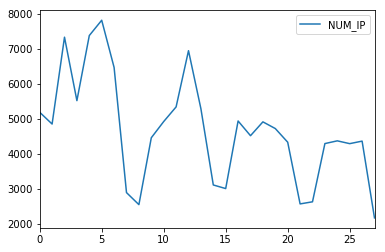

In [39]:
df_day_trfc[['FP_RATE']].plot()
df_day_trfc[['NUM_BANNED']].plot()
df_day_trfc[['NUM_TRFC']].plot()
df_day_trfc[['NUM_IP']].plot()
plt.show()